In [18]:
# !pip install --upgrade matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy import stats

#데이터 정제
data = pd.read_csv('/content/vgames2.csv').rename(columns={'Unnamed: 0':'index'})
data.index = data['index']
data.drop([data.columns[0]],axis=1,inplace=True)

#결측치 확인
print('-----각 열마다 정보 확인-----')
print(data.info())
print('\n-----각 열마다 결측치 확인--------\n',data.isnull().sum())

-----각 열마다 정보 확인-----
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB
None

-----각 열마다 결측치 확인--------
 Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64


In [19]:
#결측치 제거
data = data.dropna(axis=0)
print('\n---------각 열마다 정보 확인(결측치 제거 후)--------')
print(data.info())
print('\n---------각 열마다 결측치 확인(결측치 제거 후)--------\n',data.isnull().sum())


---------각 열마다 정보 확인(결측치 제거 후)--------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  object 
 6   EU_Sales     16241 non-null  object 
 7   JP_Sales     16241 non-null  object 
 8   Other_Sales  16241 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB
None

---------각 열마다 결측치 확인(결측치 제거 후)--------
 Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64


In [20]:
#year 재정립 함수
def re_year(year):
  year = int(year)
  if (year >= 50) & (year < 100):
    year += 1900
  elif year<50:
    year += 2000
  return year

#판매량 문자 제거 함수
def re_sale(data):
  # 'M'이 기본 값이므로 M만 제거
  if 'M' in data:
    return pd.to_numeric(data.replace('M',''))

  # 'K'일 경우 'K'제거 후 'M'단위로 변경
  elif 'K' in data:
    return pd.to_numeric(data.replace('K',''))/1000

  else:
    return pd.to_numeric(data)

#year 결측치 살리기
data['Year'] = data['Year'].apply(re_year)
data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
index,,,,,,,,,
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13


In [21]:
# Sales의 타입 변경
data.iloc[:,5:9] = data.iloc[:,5:9].applymap(re_sale)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  int64  
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.2+ MB


In [22]:
#Sales_sum 추가
data['Sales_sum'] = data.iloc[:,5:9].sum(axis=1)
data = data[(data['Year']>=2000) & (data['Year']<=2020)]
data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum
index,,,,,,,,,,
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Minna no Chizu 2,PSP,2007,Misc,Zenrin,0.00,0.00,0.02,0.00,0.02
16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01


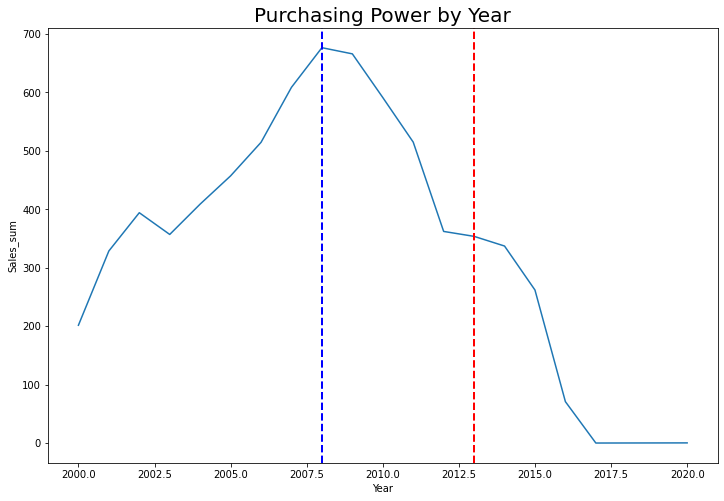

In [23]:
#연도 별 구매력 순위
year_sales = data[['Year','Sales_sum']].groupby('Year').sum()
plt.subplots(figsize=(12, 8))
plt.title('Purchasing Power by Year', fontsize=20)
ax = sns.lineplot(x='Year',y='Sales_sum', data=year_sales)
plt.axvline(x=2008,color='b', linestyle='--',linewidth=2)
plt.axvline(x=2013,color='r', linestyle='--',linewidth=2)
plt.show()

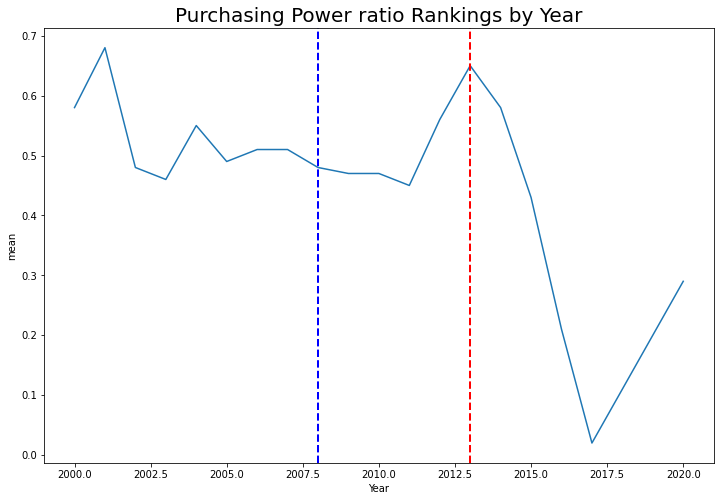

In [24]:
# 연도별 게임 게임 오픈갯수 기준 구매 비율
year_sales['open'] = data[['Year','Sales_sum']].groupby('Year').size()
year_sales['mean'] = round(year_sales['Sales_sum']/year_sales['open'],2)
temp = year_sales['mean'].reset_index()
plt.subplots(figsize=(12, 8))
plt.title('Purchasing Power ratio Rankings by Year', fontsize=20)
ax = sns.lineplot(x='Year',y='mean', data=temp)
plt.axvline(x=2008,color='b', linestyle='--',linewidth=2)
plt.axvline(x=2013,color='r', linestyle='--',linewidth=2)
plt.show()

-----가장 많은 게임을 만든 장르 순위 top 5----
 Shooter          569
Role-Playing     771
Adventure        845
Sports           953
Action          1924
Name: Genre, dtype: int64


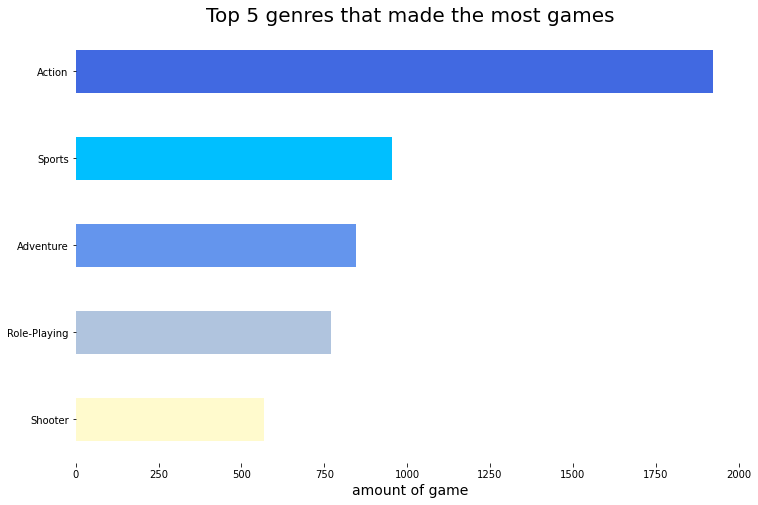

In [25]:
#가장 많은 게임을 만든 장르 순위 top 5
data2 = data[(data['Year']>=2008) & (data['Year']<=2020)]
open_genre_rank = data2['Genre'].value_counts(ascending=True).drop('Misc',axis=0).tail()

print('-----가장 많은 게임을 만든 장르 순위 top 5----\n',open_genre_rank)
colors = ['violet','coral','lightyellow','moccasin','palegreen', 'cyan' ,'deepskyblue' ,'royalblue',]
label = open_genre_rank.index
plt.figure(figsize=(12,8))
pt = open_genre_rank.plot(kind='barh', rot=0 , color = ['lemonchiffon','lightsteelblue','cornflowerblue','deepskyblue' ,'royalblue'])
plt.title('Top 5 genres that made the most games', fontsize=20)
plt.xlabel('amount of game', fontsize=14)
plt.box(False)
plt.show()

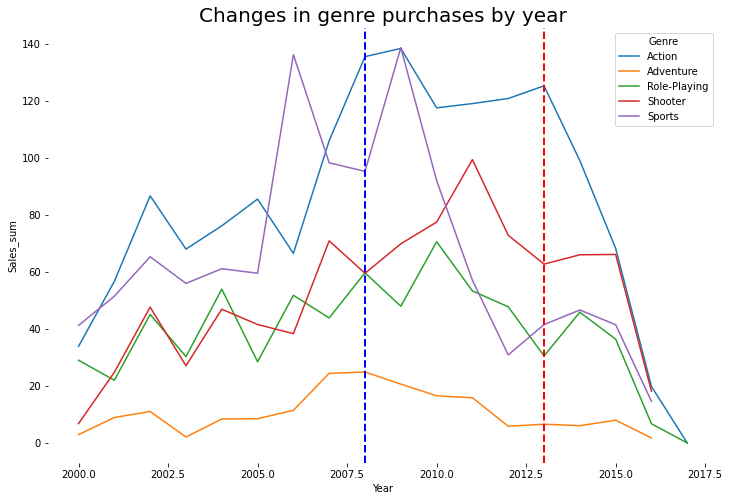

In [26]:
#연도별 트랜드 흐름
year_genre_sales = data[['Year','Genre','Sales_sum']]
year_genre_sales = year_genre_sales[year_genre_sales['Genre'].apply(lambda x:x in list(open_genre_rank.index))]
group = year_genre_sales.groupby(['Genre','Year']).sum()

plt.subplots(figsize=(12, 8))
ax = sns.lineplot(x='Year',y='Sales_sum',hue = 'Genre', data=group)
plt.title('Changes in genre purchases by year', fontsize=20)
plt.axvline(x=2008,color='b', linestyle='--',linewidth=2)
plt.axvline(x=2013,color='r', linestyle='--',linewidth=2)
plt.box(False)
plt.show()

           Genre  NA_Sales  EU_Sales  JP_Sales
0         Action    747.91    469.27    128.69
1      Adventure     82.41     49.96     36.97
2       Fighting    160.62     75.41     44.75
4       Platform    258.49    141.24     55.09
5         Puzzle     64.60     40.44     23.74
6         Racing    270.83    193.04     27.72
7   Role-Playing    271.64    150.96    231.94
8        Shooter    484.88    289.73     22.78
9     Simulation    163.20    104.34     40.06
10        Sports    585.91    339.25     75.71
11      Strategy     46.16     32.58     27.51


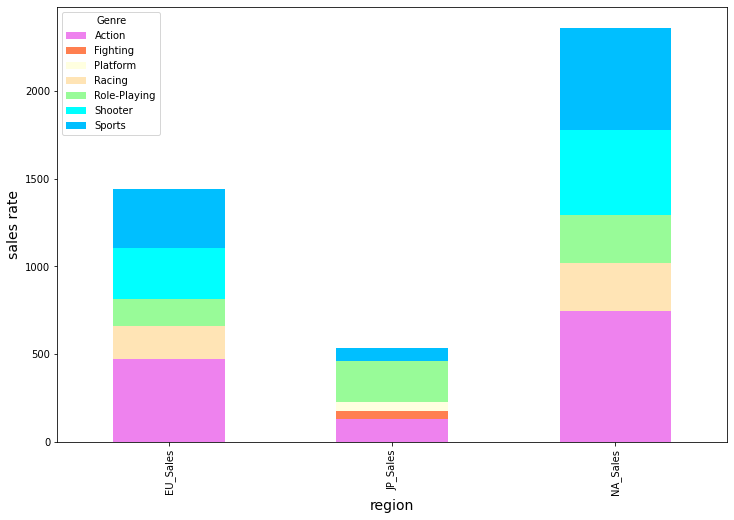

In [27]:
#지역별 선호 장르
def top(df, n=5, column='value'):
    return df.sort_values(by=column, ascending=False)[:n]

region_genre = data.iloc[:,[3,5,6,7,8]].groupby('Genre').sum().reset_index()
region_genre = region_genre.drop(region_genre[region_genre['Genre']=='Misc'].index,axis=0).drop('Other_Sales',axis=1)
print(region_genre)
temp = region_genre.melt(id_vars = 'Genre', value_vars = ['NA_Sales', 'EU_Sales','JP_Sales'])
temp2 = temp.groupby('variable').apply(top).drop('variable',axis=1).reset_index().drop('level_1',axis=1).pivot(index='variable',columns='Genre',values='value').fillna(0)
label = temp2.index
fi = temp2.plot.bar(stacked=True, figsize=(12,8), color=colors)
plt.ylabel('sales rate', fontsize=14)
plt.xlabel('region', fontsize=14)
plt.show()

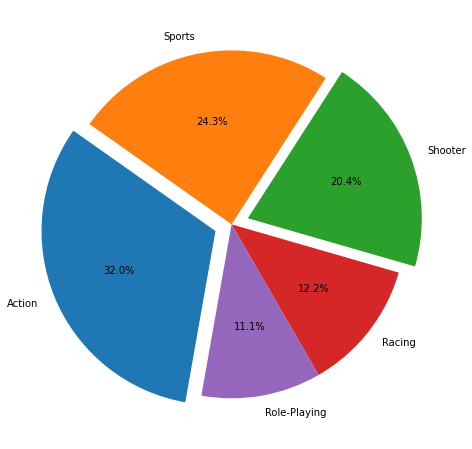

In [28]:
#EU와 NA를 합친 원의 그래프를 그린다!
temp3 = region_genre[['EU_Sales','NA_Sales']]
temp3.index = region_genre['Genre']
temp3 = temp3.sum(axis=1)
temp3 = temp3.sort_values(ascending=False).head()
plt.subplots(figsize=(12, 8))
plt.pie(temp3, labels=temp3.index, autopct='%.1f%%', startangle=260, counterclock=False, explode = [0.1,0,0.1,0,0])
plt.show()

#이 결과로 현재 게임시장에서 어떤것이 제일 인기가 많았는지 알 수 있다.

  Platform  Sales_sum
0     X360     968.59
1      PS3     946.74
2      Wii     900.15
3       DS     799.76
4      PS2     419.38


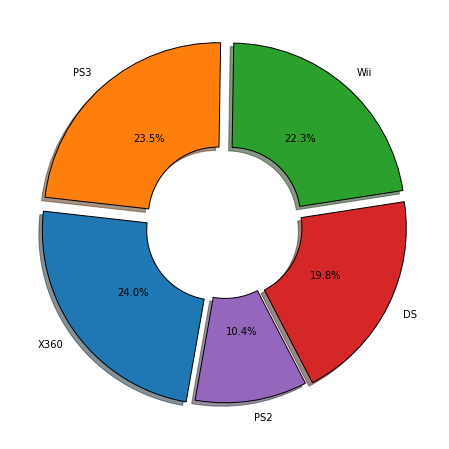

In [29]:
#가장 높은 2의 장르 중 게임 분석 인기많은 퍼블리셔가 어디인지? 게임이름이 뭔지?

# data3 = data.sort_values('Sales_sum',ascending=False)
# temp1 = data3[['Publisher','Platform','Sales_sum']].groupby(['Publisher','Platform']).sum().sort_values(by='Sales_sum', ascending=False).head(5).reset_index()
# print(temp1)
# plt.subplots(figsize=(12, 8))
# plt.pie(temp1['Sales_sum'], labels=temp1['Platform'], autopct='%.1f%%', startangle=260, counterclock=False)
# plt.show()

condition = (data['Year'] >= 2005 ) & (data['Year'] <= 2020)
data3 = data[condition].sort_values('Sales_sum',ascending=False)
temp1 = data3[['Publisher','Platform','Sales_sum']].groupby(['Platform']).sum().sort_values(by='Sales_sum', ascending=False).head(5).reset_index()
print(temp1)
plt.subplots(figsize=(12, 8))
explode = temp1['Sales_sum']/(temp1['Sales_sum'].sum()*4)
wedgeprops = {'width': 0.6, 'linewidth': 1, 'edgecolor': 'black'}
plt.pie(temp1['Sales_sum'], labels=temp1['Platform'], autopct='%.1f%%', startangle=260, counterclock=False, explode = explode, wedgeprops = wedgeprops, shadow = True)
plt.show()

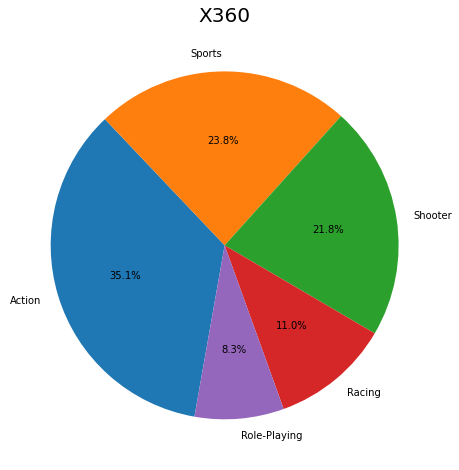

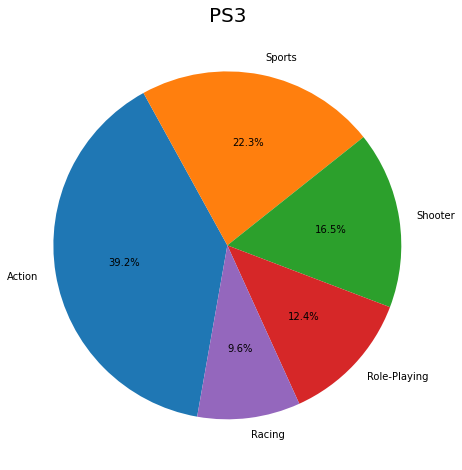

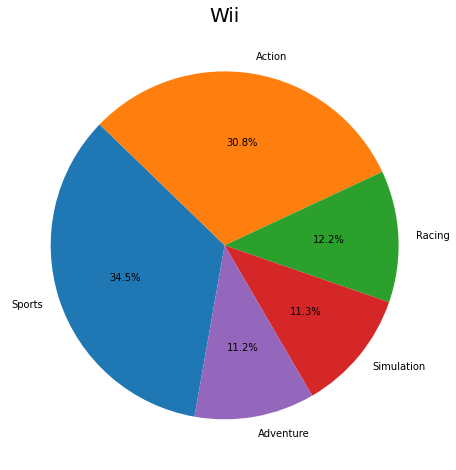

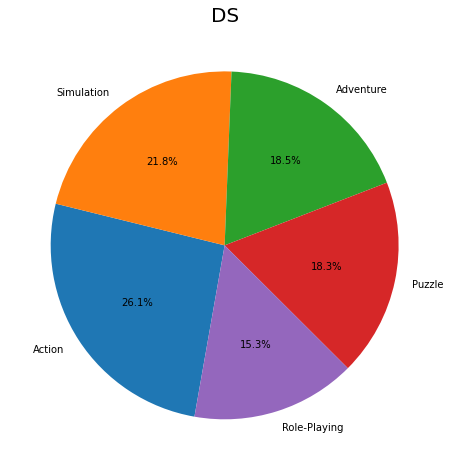

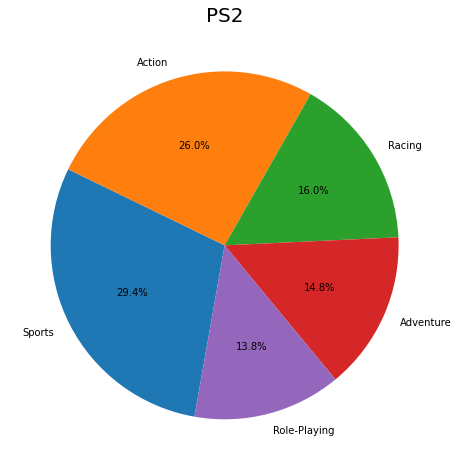

In [30]:
#플랫폼별 좋아하는 게임 성향
def top(df, n=5):
    return df.sort_values(by='count', ascending=False)[:n]

def classfirank(data):
  plt.subplots(figsize=(12, 8))
  plt.title(data.iloc[0,0], fontsize=20)
  plt.pie(data['count'], labels=data['Genre'], autopct='%.1f%%', startangle=260, counterclock=False)
  return plt.show()

data4 = data[data['Platform'].isin(temp1['Platform'])]
data4 = data4[['Platform','Genre']].groupby(['Platform','Genre']).size().reset_index(name='count')
data4 = data4.drop(data4[data4['Genre']=='Misc'].index,axis=0)
data4 = data4.groupby('Platform').apply(top).drop('Platform',axis=1).reset_index().drop('level_1',axis=1)

for plat in temp1['Platform']:
  classfirank(data4[data4['Platform']==plat])

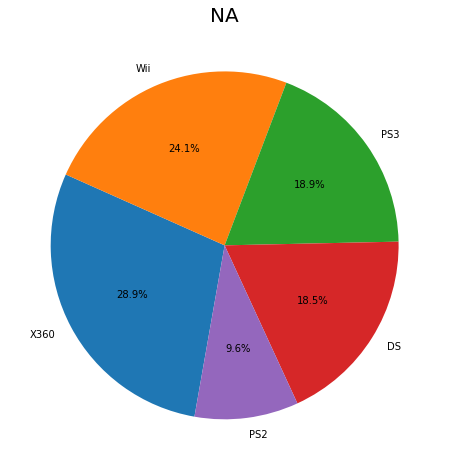

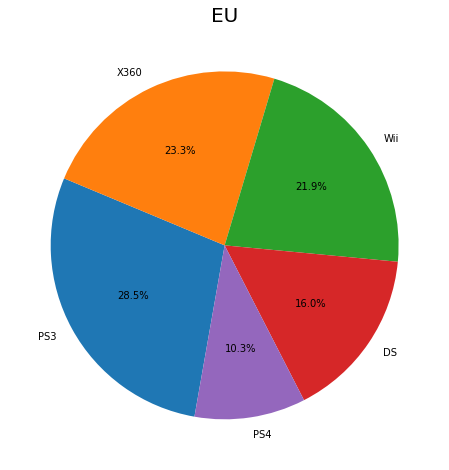

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


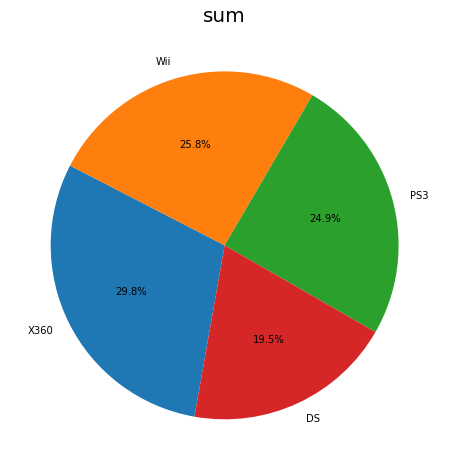

In [31]:
# 지역별 선호 플랫폼
def plot_dr(temp1,name):
  plt.subplots(figsize=(12, 8))
  plt.title(name, fontsize=20)
  wedgeprops = {'width': 0.6, 'linewidth': 1, 'edgecolor': 'black'}
  plt.pie(temp1.iloc[:,1], labels=temp1['Platform'], autopct='%.1f%%', startangle=260, counterclock=False)
  return plt.show()


data6 = data[(data['Year']>=2005) & (data['Year']<=2020)]
search_data = data6[['Platform','NA_Sales','EU_Sales','JP_Sales','Sales_sum']]
search_data_group = search_data.groupby('Platform').sum().reset_index()
na = search_data_group[['Platform','NA_Sales']].sort_values('NA_Sales',ascending=False).head()
plot_dr(na,'NA')
eu = search_data_group[['Platform','EU_Sales']].sort_values('EU_Sales',ascending=False).head()
plot_dr(eu,'EU')

na_eu = pd.merge(na,eu)
na_eu['sum']=na_eu.sum(axis=1)
plot_dr(na_eu[['Platform','sum']],'sum')



In [32]:
# 해당 채택된 게임이 고유의 IP의 게임을 여러개 냈는지? 여러개 냈다면 고유의 IP 가격이 비쌀것이다 때문에 대박 작품중 IP가 1개인 게임을 찾아야함
def discribe(df):
    return df.sort_values('Sales_sum',ascending=False)[:3]

temp3 = temp3[[0,2]]
print(temp3)
condition = (data['Genre'].isin(temp3.head(3).index)) & (data['Platform'].isin(temp1['Platform'].head(4)) & (data['Year']>=2005) & (data['Year']<=2020))
data5 = data[condition]
data5 = data5[['Name','Genre','Publisher','Sales_sum']]
data5 = data5.groupby('Publisher').apply(discribe).drop('Publisher',axis=1).reset_index().drop('index',axis=1)
temp4 = data5.drop('Name',axis=1).groupby('Publisher').sum().sort_values('Sales_sum',ascending=False).head()
index = temp4.index
data5 = data5[data5['Publisher'].isin(index)].sort_values('Sales_sum',ascending=False)
data5.reset_index().drop('index',axis=1)

Genre
Action     1217.18
Shooter     774.61
dtype: float64


,Publisher,Name,Genre,Sales_sum
0,Take-Two Interactive,Grand Theft Auto V,Action,21.39
1,Take-Two Interactive,Grand Theft Auto V,Action,16.38
2,Activision,Call of Duty: Modern Warfare 3,Shooter,14.76
3,Activision,Call of Duty: Black Ops,Shooter,14.64
4,Activision,Call of Duty: Black Ops II,Shooter,14.04
5,Microsoft Game Studios,Halo 3,Shooter,12.14
6,Nintendo,Pokemon HeartGold/Pokemon SoulSilver,Action,11.90
7,Take-Two Interactive,Grand Theft Auto IV,Action,11.03
8,Microsoft Game Studios,Halo: Reach,Shooter,9.87
9,Microsoft Game Studios,Halo 4,Shooter,9.76


In [33]:
#추가 검색 사항 만약 Action을 좋아하는 사람들의 plotform 분석 어떻게 분석할 것인가.... 일단 위에 나온거 데이터 기준으로 클러스터링 해야 할것 같은데...
def classifition1(data):
  if 'Grand Theft Auto' in data:
    return True
  else:
    return False
result = data[data['Name'].apply(classifition1)].sort_values('Sales_sum',ascending=False)
search_result = result.reset_index().drop('index',axis=1)
print('sum : ',search_result['Sales_sum'].sum())
print('mean : ',search_result['Sales_sum'].sum()/24)
print('discribe : ',search_result.iloc[:,5:9].sum())

def classifition2(data):
  if 'Call of Duty' in data:
    return True
  else:
    return False
result2 = data[data['Name'].apply(classifition2)].sort_values('Sales_sum',ascending=False)
search_result2 = result2.reset_index().drop('index',axis=1)
print('sum : ',search_result2['Sales_sum'].sum())
print('mean : ',search_result2['Sales_sum'].sum()/57)
print('discribe : ',search_result2.iloc[:,5:9].sum())
search_result

sum :  154.89
mean :  6.453749999999999
discribe :  NA_Sales       71.82
EU_Sales       50.53
JP_Sales        3.73
Other_Sales    28.81
dtype: float64
sum :  243.53999999999996
mean :  4.272631578947368
discribe :  NA_Sales       127.62
EU_Sales        82.06
JP_Sales         4.20
Other_Sales     29.66
dtype: float64


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum
0,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
1,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
2,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
3,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
4,Grand Theft Auto III,PS2,2001,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
5,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99
6,Grand Theft Auto IV,X360,2008,Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.03
7,Grand Theft Auto IV,PS3,2008,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.58
8,Grand Theft Auto: Liberty City Stories,PSP,2005,Action,Take-Two Interactive,2.90,2.83,0.24,1.75,7.72
9,Grand Theft Auto: Vice City Stories,PSP,2006,Action,Take-Two Interactive,1.70,2.02,0.16,1.21,5.09


In [34]:
# temp3 = temp2

# # def survey(results, category_names):
#     # labels = results.index
#     # data = np.array(list(np.array(results)))
#     # data_cum = data.cumsum(axis=1)
# #     category_colors = colors

# #     fig, ax = plt.subplots(figsize=(9.2, 5))
# #     ax.invert_yaxis()
# #     ax.xaxis.set_visible(False)
# #     ax.set_xlim(0, np.sum(data, axis=1).max())

# #     for i, (colname, color) in enumerate(zip(category_names, category_colors)):
# #         print('i : ',i)
# #         print('(colname, color)',(colname, color))
# #         widths = data[:, i]
# #         starts = data_cum[:, i] - widths
# #         rects = ax.barh(labels, widths, left=starts, height=0.5,label=colname, color=color)

# #         text_color = 'darkgrey'
# #         ax.bar_label(rects, label_type='center', color=text_color)
    
# #     ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),loc='lower left', fontsize='small')

# #     return fig, ax
# def survey(results, category_names):
#     labels = results.index
#     data = np.array(list(np.array(results)))
#     data_cum = data.cumsum(axis=1)
#     category_colors = plt.colormaps['RdYlGn'](
#         np.linspace(0.15, 0.85, data.shape[1]))

#     fig, ax = plt.subplots(figsize=(12, 8))
#     ax.invert_yaxis()
#     ax.xaxis.set_visible(False)
#     ax.set_xlim(0, np.sum(data, axis=1).max())

#     for i, (colname, color) in enumerate(zip(category_names, category_colors)):
#         widths = data[:, i]
#         starts = data_cum[:, i] - widths
#         rects = ax.barh(labels, widths, left=starts, height=0.5,
#                         label=colname, color=color)
#         print(rects)
#         r, g, b, _ = color
#         text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
#         ax.bar_label(rects, label_type='center', color=text_color)
#     ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
#               loc='lower left', fontsize='small')

#     return fig, ax
# survey(temp2, temp2.columns)
# plt.show()